In [16]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

east london za
barauna br
upernavik gl
tessalit ml
pevek ru
cape town za
halalo wf
vila velha br
yerbogachen ru
maltahohe na
chivay pe
padang id
ushuaia ar
tuktoyaktuk ca
khatanga ru
yellowknife ca
nishihara jp
balaipungut id
hobart au
kaitangata nz
noumea nc
bara sd
sorland no
berlevag no
korla cn
mataura pf
ushuaia ar
vaini to
maniitsoq gl
hermanus za
ilulissat gl
mizan teferi et
jamestown sh
nuuk gl
vanimo pg
ushuaia ar
tifton us
bandar-e lengeh ir
saint george bm
camacha pt
arraial do cabo br
geraldton au
senekal za
vaini to
thompson ca
koungou yt
dingle ie
punta arenas cl
marcona pe
hobart au
hua hin th
grindavik is
kununurra au
nioro ml
plavinas lv
padang id
ilulissat gl
zemio cf
puteyets ru
lorengau pg
coihueco cl
maniitsoq gl
bluff nz
souillac mu
rikitea pf
barentsburg sj
abaza ru
port alfred za
usinsk ru
chokurdakh ru
saskylakh ru
ribeira grande pt
thompson ca
mataura pf
adamovka ru
balabac ph
ushuaia ar
hobart au
andevoranto mg
broome au
vila velha br
arkhangelsk ru
ushuaia a

rikitea pf
mozarlandia br
cape town za
rikitea pf
ushuaia ar
mackenzie ca
mys shmidta ru
upernavik gl
taolanaro mg
ksenyevka ru
noumea nc
ushuaia ar
glens falls us
east london za
gat ly
vikhorevka ru
ituni gy
taolanaro mg
avarua ck
romny ru
port elizabeth za
port alfred za
san patricio mx
presidencia roque saenz pena ar
victoria sc
port-gentil ga
busselton au
butaritari ki
hilo us
hede cn
neiafu to
salalah om
nikolskoye ru
arlit ne
richards bay za
katherine au
itaqui br
baykit ru
touros br
kampong chhnang kh
cape town za
quatre cocos mu
bethel us
te anau nz
pincher creek ca
bredasdorp za
mataura pf
east london za
zyryanka ru
albany au
santa cruz cr
kozienice pl
saldanha za
taksimo ru
cedartown us
hilo us
coquimbo cl
saint george bm
torbay ca
taolanaro mg
omsukchan ru
bambous virieux mu
siavonga zm
kapaa us
rikitea pf
mataura pf
hobart au
punta arenas cl
marsaxlokk mt
punta arenas cl
jamestown sh
yellowknife ca
kodiak us
iquique cl
ancud cl
busselton au
albany au
taolanaro mg
vaini to
m

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [11]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 1 | east london
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | barauna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | upernavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | tessalit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | pevek
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | cape town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | halalo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | vila velha
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | saskylakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | ribeira grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | adamovka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | balabac
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | andevoranto
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | broome
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | arkhangelsk
-----------------------------
Data Retrieval 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 3 | havre-saint-pierre
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | meulaboh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | kahului
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | bredasdorp
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | ouargaye
-----------------------------
Data Retrieval Complete      
--------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 4 | torbay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 4 | butaritari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | nueva helvecia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | fagersta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | bor
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | illoqqortoormiut
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | trairi
-----------------------------
Data Retrieval Com

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 5 | umzimvubu
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | gat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | nhulunbuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | wilmington
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | belmonte
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | coahuayana
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | ginir
-----------------------------
Data Retrieval Complete      
---

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | majene
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | xuanhua
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | zhigansk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | talnakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | yinchuan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | manokwari
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | lahij
-----------------------------
Data Retrieval Complete      
-----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | quatre cocos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | pincher creek
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | zyryanka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | santa cruz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | kozienice
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | saldanha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | taksimo
-----------------------------
Data Retrieval Complete      
------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | louisbourg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | mende
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | astoria
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | waddan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | brae
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | cap malheureux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 9 | assens
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | dzhebariki-khaya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | turinsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | manado
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | sangar
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | qaqortoq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | vardo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | porto novo
-----------------------------
Data Retrieval Complete      
-------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 10 of Set 12 | omboue
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | ikornnes
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | tuyen quang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | murdochville
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | cao bang
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | comodoro rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | kapustin yar
-----------------------------
Data Retrieval Complete    

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,East London,-33.0153,27.9116,70.74,83,20,5.75,ZA,2022-04-04 16:53:36
1,Barauna,-5.0800,-37.6167,87.42,57,91,8.57,BR,2022-04-04 16:53:37
2,Upernavik,72.7868,-56.1549,26.22,76,99,2.62,GL,2022-04-04 16:53:37
3,Tessalit,20.1986,1.0114,103.75,3,1,15.35,ML,2022-04-04 16:53:37
4,Pevek,69.7008,170.3133,-21.59,98,28,2.46,RU,2022-04-04 16:53:38
5,Cape Town,-33.9258,18.4232,65.88,81,20,13.80,ZA,2022-04-04 16:53:38
6,Vila Velha,-20.3297,-40.2925,87.75,69,40,11.50,BR,2022-04-04 16:53:38
7,Yerbogachen,61.2767,108.0108,-3.24,100,81,3.38,RU,2022-04-04 16:53:39
8,Maltahohe,-24.8333,16.9833,67.80,18,0,13.18,NA,2022-04-04 16:53:39
9,Chivay,-15.6383,-71.6011,56.75,56,79,6.24,PE,2022-04-04 16:53:39


In [15]:
new_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,East London,ZA,2022-04-04 16:53:36,-33.0153,27.9116,70.74,83,20,5.75
1,Barauna,BR,2022-04-04 16:53:37,-5.0800,-37.6167,87.42,57,91,8.57
2,Upernavik,GL,2022-04-04 16:53:37,72.7868,-56.1549,26.22,76,99,2.62
3,Tessalit,ML,2022-04-04 16:53:37,20.1986,1.0114,103.75,3,1,15.35
4,Pevek,RU,2022-04-04 16:53:38,69.7008,170.3133,-21.59,98,28,2.46
5,Cape Town,ZA,2022-04-04 16:53:38,-33.9258,18.4232,65.88,81,20,13.80
6,Vila Velha,BR,2022-04-04 16:53:38,-20.3297,-40.2925,87.75,69,40,11.50
7,Yerbogachen,RU,2022-04-04 16:53:39,61.2767,108.0108,-3.24,100,81,3.38
8,Maltahohe,NA,2022-04-04 16:53:39,-24.8333,16.9833,67.80,18,0,13.18
9,Chivay,PE,2022-04-04 16:53:39,-15.6383,-71.6011,56.75,56,79,6.24


In [17]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data","cities.csv")
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

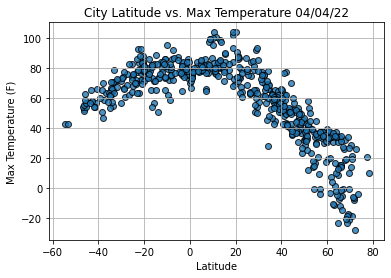

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat.png")

# Show plot.
plt.show()

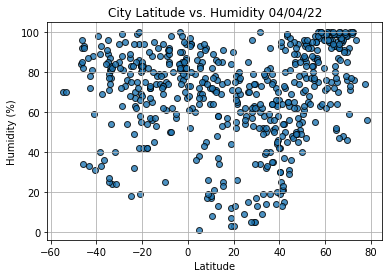

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

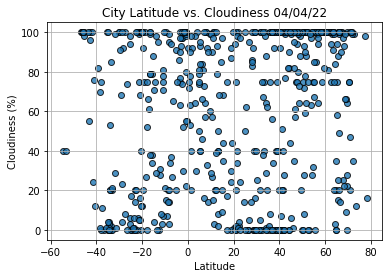

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

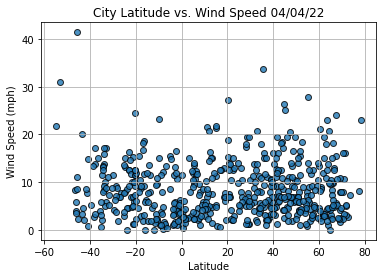

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()